In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 43s 7ms/step - loss: 1.5674 - accuracy: 0.4275 - val_loss: 1.2997 - val_accuracy: 0.5271
Epoch 2/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2776 - accuracy: 0.5369 - val_loss: 1.1768 - val_accuracy: 0.5691
Epoch 3/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1529 - accuracy: 0.5866 - val_loss: 1.0348 - val_accuracy: 0.6275
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0609 - accuracy: 0.6224 - val_loss: 1.0080 - val_accuracy: 0.6385
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9944 - accuracy: 0.6452 - val_loss: 0.9343 - val_accuracy: 0.6728
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9293 - accuracy: 0.6704 - val_loss: 0.9070 - val_accuracy: 0.6802
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8733 - accuracy: 0.6871 - val_loss: 0.8744 - val_ac

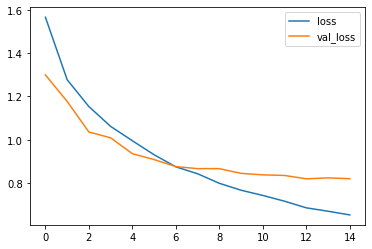

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

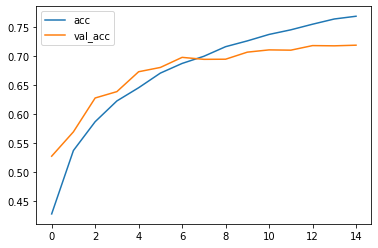

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[767  13  27   9  18   5   5   4 109  43]
 [ 15 837   3   4  10   2   8   0  21 100]
 [ 90   6 542  65 118  61  63  26  20   9]
 [ 29  14  55 497  79 185  53  34  28  26]
 [ 22   2  57  47 719  42  35  52  19   5]
 [ 28   4  48 157  59 617  25  39  15   8]
 [  8  10  37  59  48  23 792   8   8   7]
 [ 19   5  24  31  77  57   7 744  11  25]
 [ 44  28  11  10   9   3   4   7 860  24]
 [ 38  78   7   8   5   7   7   8  31 811]]


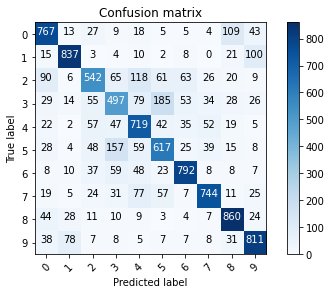

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [10]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

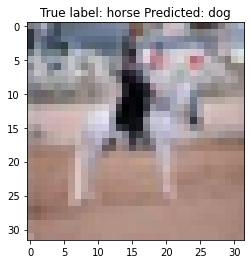

In [11]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));